In [4]:
pip install mne


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /ro

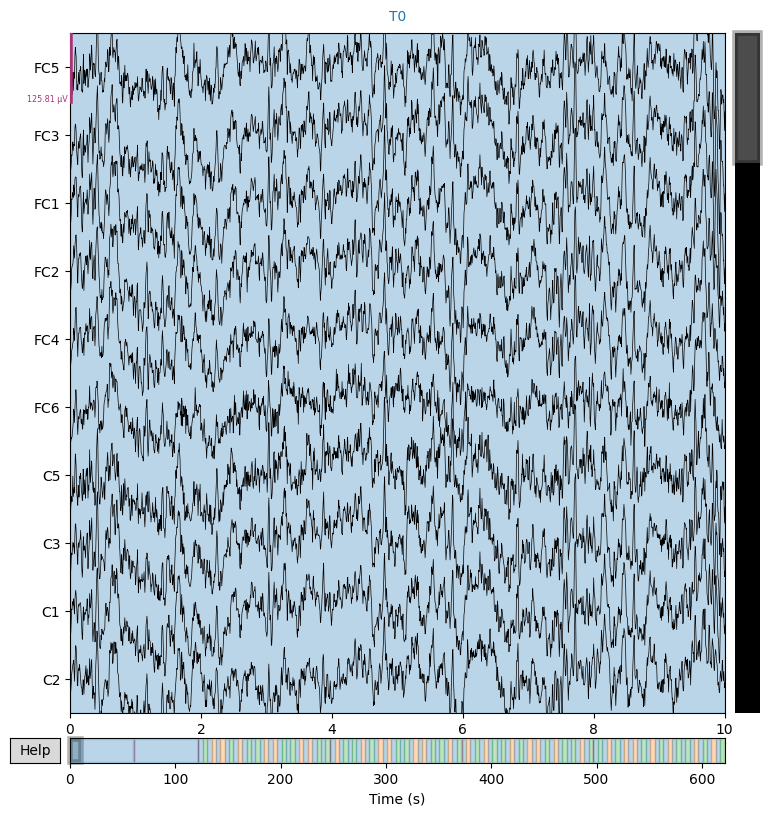

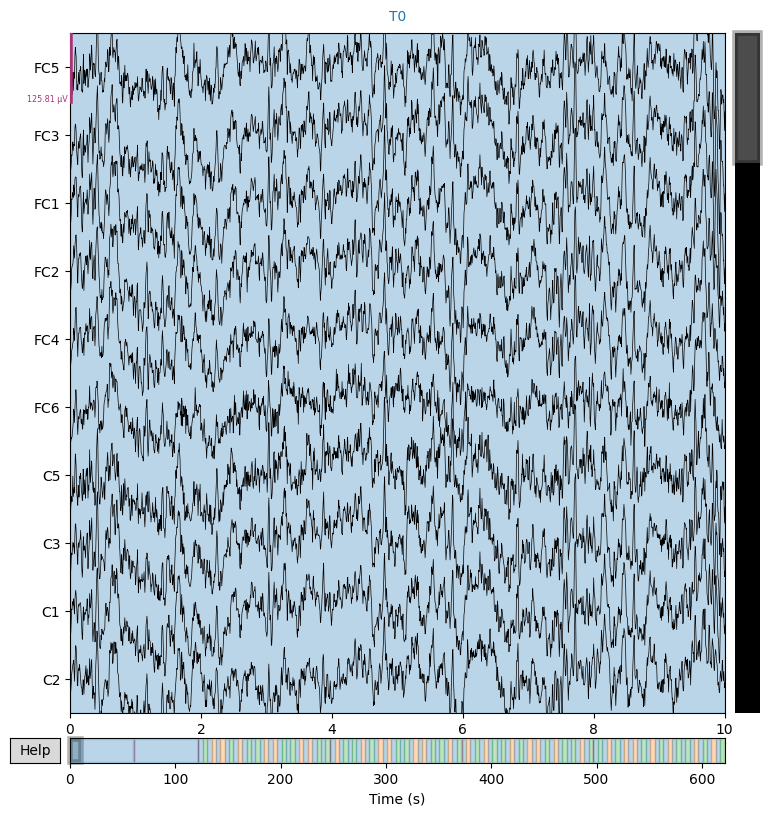

In [17]:
#Original porque esta técnica es
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws
import matplotlib.pyplot as plt

# ---------- Parámetros de adquisición ----------
subject = 1  # número de sujeto (entre 1 y 109)
runs = [1, 2, 6, 10, 13, 14]  # 1=ojos abiertos, 2=ojos cerrados, otros=imaginería motora

# ---------- Descargar los archivos desde PhysioNet ----------
# Use the subjects parameter instead of subject
raw_fnames = eegbci.load_data(subjects=[subject], runs=runs)

# ---------- Leer y concatenar los archivos EDF ----------
raw_list = [mne.io.read_raw_edf(f, preload=True) for f in raw_fnames]
raw = concatenate_raws(raw_list)

# Rename channels to match the montage
channel_map = {ch_name: ch_name.replace('.', '').upper() for ch_name in raw.ch_names}
raw.rename_channels(channel_map)

# Add a standard 10-05 electrode montage
montage = mne.channels.make_standard_montage('standard_1005')

# Drop channels that are not in the montage
channels_to_drop = [ch for ch in raw.ch_names if ch not in montage.ch_names]
raw.drop_channels(channels_to_drop)

# Set the montage
raw.set_montage(montage)


# ---------- Información básica ----------
print(raw.info)            # muestra metadatos (canales, frecuencia de muestreo, etc.)
print(raw.ch_names[:10])   # primeros 10 nombres de canales
print(f"Duración total: {raw.n_times / raw.info['sfreq']} segundos")

# ---------- Mostrar los datos EEG crudos ----------
raw.plot(n_channels=10, scalings='auto', title="EEG crudo", block=True)

Filtering raw data in 6 contiguous segments
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1057 samples (6.606 s)

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.1s finished


Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1057 samples (6.606 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1057 samples (6.606 s)

Filtering raw data in 6 contiguous segments


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.1s finished


Setting up band-pass filter from 5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (1.656 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.1s finished


Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
Fitting ICA to data using 52 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 14.1s.


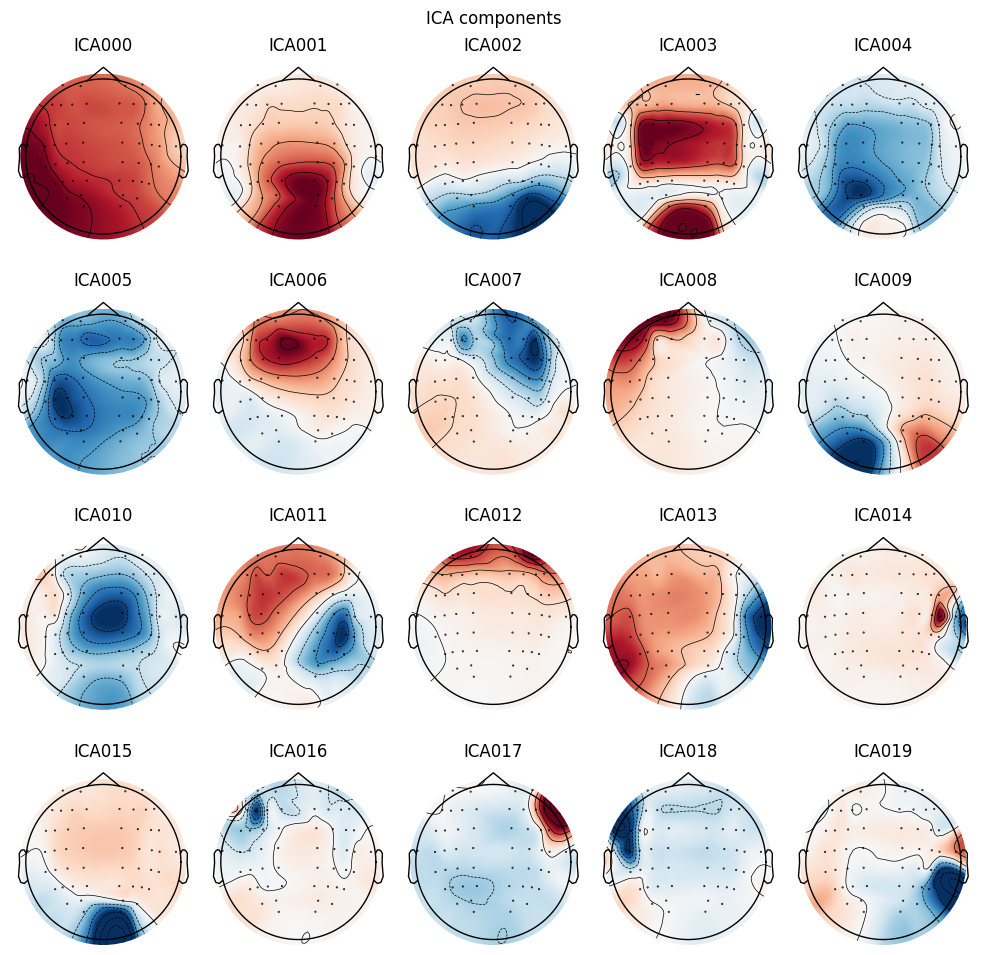

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


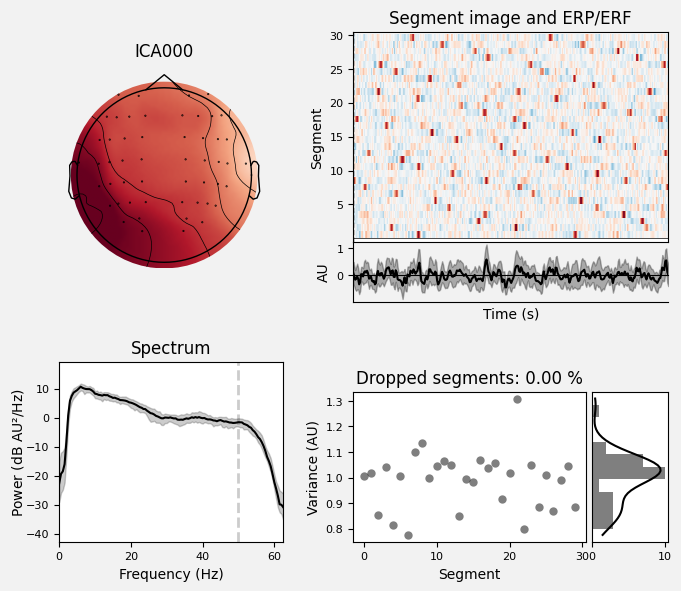

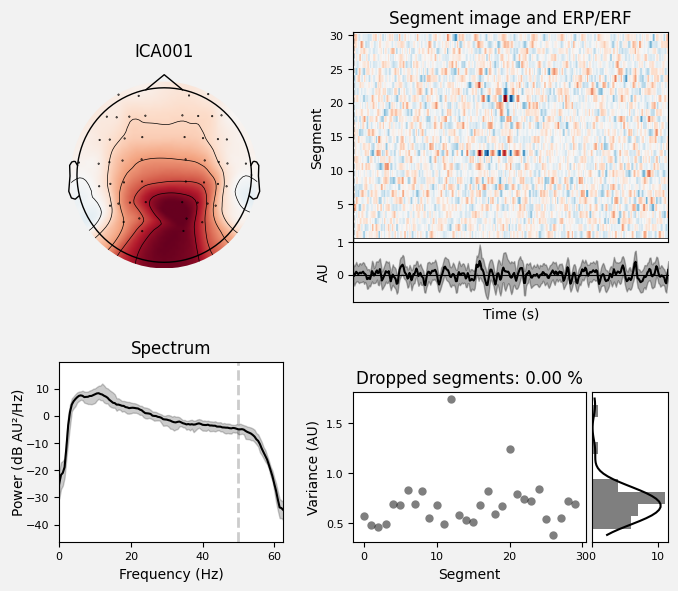

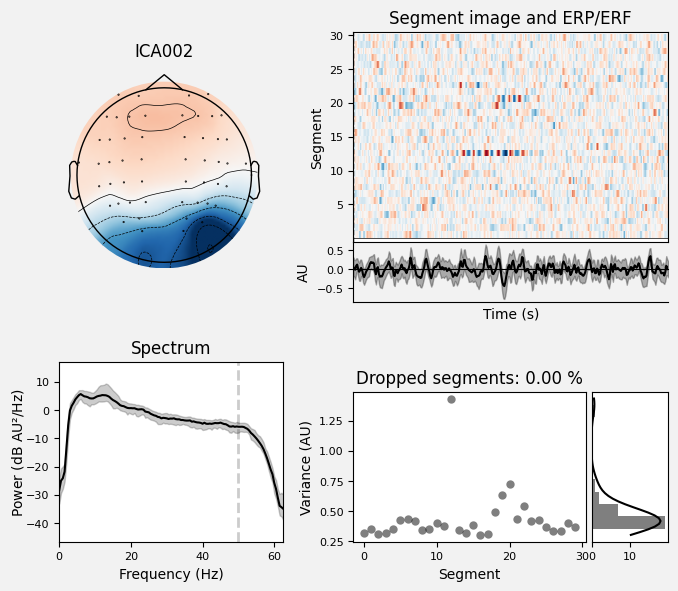

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 52 PCA components


<RawEDF | S001R01.edf, 52 x 99520 (622.0 s), ~39.5 MiB, data loaded>

In [18]:
#Filtro notch
raw.notch_filter(freqs=60, verbose=True)

#Filtro pasa banda (5 – 50 Hz)
raw.filter(l_freq=5., h_freq=50., fir_design='firwin', verbose=True)

#Identificar eventos para futuras segmentaciones
events, event_id = mne.events_from_annotations(raw)

ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
# Now that the montage is set, plotting should work
ica.plot_components()
ica.plot_properties(raw, picks=[0, 1, 2])

ica.exclude = [0, 1]  # ajusta estos valores tras inspección visual

ica.apply(raw)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /ro

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.1s finished


Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1057 samples (6.606 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.1s finished


Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1057 samples (6.606 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.1s finished


Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1057 samples (6.606 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 6 contiguous segments
Setting up band-pass filter from 5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (1.656 s)



[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.1s finished


Fitting ICA to data using 52 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 19.3s.


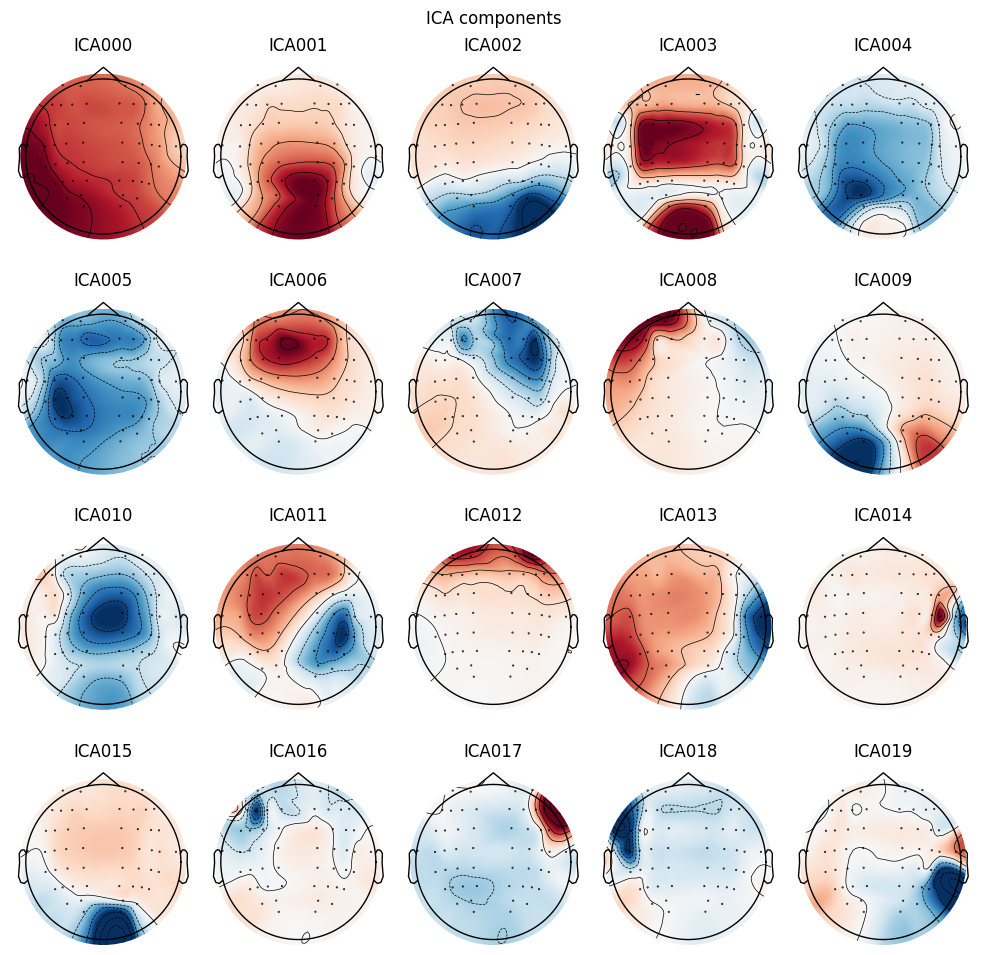

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 52 PCA components
Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
Not setting metadata
122 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 122 events and 401 original time points ...
6 bad epochs dropped
NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").
Applying baseline correction (mode: logratio)


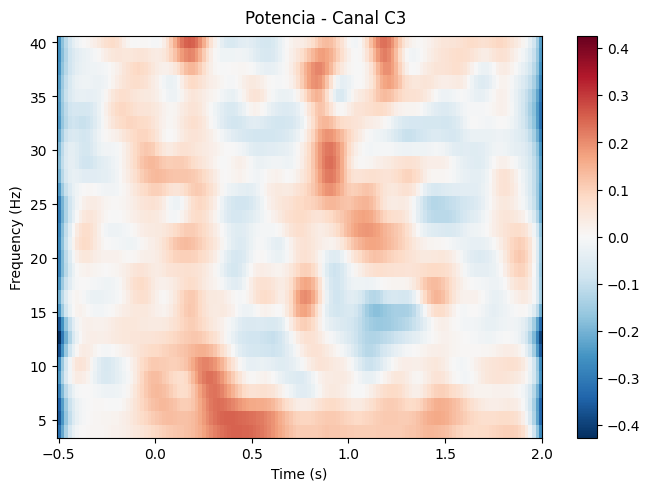

Potencia promedio por banda (primeras 5 épocas):
theta: [3.14986236e-09 4.15688496e-09 5.11343806e-09 4.87797499e-09
 3.68851729e-09]
alpha: [2.82181790e-09 4.16603453e-09 4.34322313e-09 4.19844549e-09
 3.68127144e-09]
beta: [1.25546639e-09 1.67512402e-09 1.80030531e-09 1.61360026e-09
 1.32879338e-09]
gamma: [5.19559900e-10 4.98754267e-10 4.87366044e-10 4.41749113e-10
 3.76415010e-10]


In [25]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# ---------- Carga de datos ----------
subject = 1
runs = [1, 2, 6, 10, 13, 14]
raw_fnames = mne.datasets.eegbci.load_data(subject=subject, runs=runs)
raw_list = [mne.io.read_raw_edf(f, preload=True) for f in raw_fnames]
raw = mne.concatenate_raws(raw_list)

# Rename channels to match the montage
channel_map = {ch_name: ch_name.replace('.', '').upper() for ch_name in raw.ch_names}
raw.rename_channels(channel_map)

# Add a standard 10-05 electrode montage
montage = mne.channels.make_standard_montage('standard_1005')

# Drop channels that are not in the montage
channels_to_drop = [ch for ch in raw.ch_names if ch not in montage.ch_names]
raw.drop_channels(channels_to_drop)

# Set the montage
raw.set_montage(montage)


# ---------- Filtros ----------
raw.notch_filter(freqs=60)                         # Filtro notch a 60 Hz
raw.filter(l_freq=5., h_freq=50.)                 # Filtro pasa banda 5–50 Hz

# ---------- ICA para artefactos ----------
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.plot_components()
ica.exclude = [0, 1]                               # Ajusta esto tras revisar visualmente
ica.apply(raw)

# ---------- Eventos y segmentación en epochs ----------
events, event_id = mne.events_from_annotations(raw)
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.5, tmax=2.0, baseline=None, preload=True)

# ---------- Análisis Wavelet (Morlet) ----------
freqs = np.linspace(4, 40, 30)                     # 30 frecuencias de 4 a 40 Hz
n_cycles = freqs / 2.                              # Más ciclos para frecuencias altas

power = mne.time_frequency.tfr_morlet(
    epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True,
    return_itc=False, decim=3, n_jobs=1
)

# ---------- Visualización opcional ----------
power.plot(picks='C3', baseline=(None, 0), mode='logratio', title='Potencia - Canal C3')

# ---------- Extracción de features por bandas ----------
bands = {
    'theta': (4, 8),
    'alpha': (8, 12),
    'beta': (13, 30),
    'gamma': (30, 40),
}

band_power = {}
for band, (fmin, fmax) in bands.items():
    cropped_power_data = power.copy().crop(fmin=fmin, fmax=fmax).data
    # Promedio: epochs × channels × frequencies -> epochs × channels (average over frequencies)
    # Then average over channels to get epochs
    band_power[band] = cropped_power_data.mean(axis=2).mean(axis=1)

# ---------- Mostrar ejemplo de feature extraída ----------
print("Potencia promedio por banda (primeras 5 épocas):")
for band in band_power:
    print(f"{band}: {band_power[band][:5]}")

Número de componentes retenidos: 3


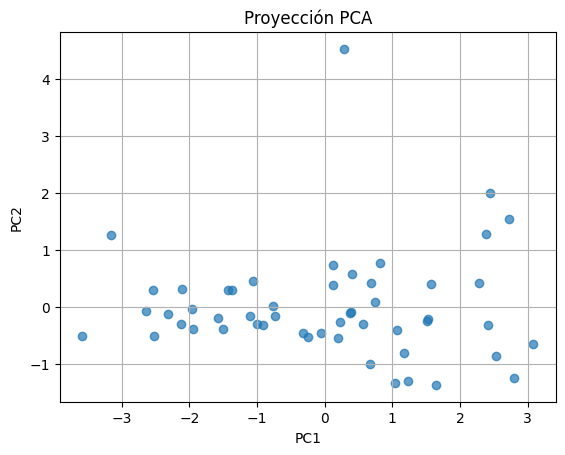

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Stack the 1D arrays from band_power horizontally
features = np.column_stack([band_power[band] for band in ['theta', 'alpha', 'beta', 'gamma']])

# The columns are simply the band names
columns = ['theta', 'alpha', 'beta', 'gamma']
df_features = pd.DataFrame(features, columns=columns)

scaler = StandardScaler()
features_normalized = scaler.fit_transform(df_features)

df_stats = pd.DataFrame()
df_stats["mean"] = features_normalized.mean(axis=1)
df_stats["std"] = features_normalized.std(axis=1)
df_stats["max"] = features_normalized.max(axis=1)
df_stats["min"] = features_normalized.min(axis=1)

pca = PCA(n_components=0.95)
features_pca = pca.fit_transform(features_normalized)

print(f"Número de componentes retenidos: {features_pca.shape[1]}")

plt.scatter(features_pca[:, 0], features_pca[:, 1], alpha=0.7)
plt.title("Proyección PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()